Apply PCA to reduce dimensionality in modeling net migration into US counties.  This notebook is first step: building the  correlation matrix

Data come from [US Census](https://bit.ly/38PyfmR), [Income Inequality Data](https://www.census.gov/data/tables/time-series/demo/income-poverty/historical-income-households.html), [Bureau of Labor Statistics](https://www.bls.gov/lau/#tables), [Center for Disease Control and Prevention](https://wonder.cdc.gov/controller/datarequest/D77;jsessionid=8C4B35CF4C4E32D332C6B5CF02580AA7), [Community Commons](https://engagementnetwork.org/map-room/)

This notebook must be in the same folder as the [mobilityHelpers](https://www.dropbox.com/s/0m77gl9p58rpdx7/mobilityHelpers.ipynb?dl=0) notebook

In [16]:
%run ./mobilityHelpers.ipynb
helpers = mobilityHelpers()

gdpFile = helpers.mFiles["gdp"]
piFile = helpers.mFiles["pi"]
hhiFile = helpers.mFiles["hhi"]
populationFile = helpers.mFiles["pop"]
suicideFile = helpers.mFiles["sc"]
employFile = helpers.mFiles["emp"]
educationFile = helpers.mFiles["ed"]
employFile

'./../../ResearchProposal/unemployment/employment_by_county_state_year.csv'

In [17]:
edDF, edDFlong = helpers.getMostRecentEducationData()
edDFlong.tail()

edDFlong

,state,county,county_state,value,metric,year
0,Alabama,Autauga,"Autauga, Alabama",11.3,pct__lt_high_school_diploma,2014
1,Alabama,Baldwin,"Baldwin, Alabama",9.7,pct__lt_high_school_diploma,2014
2,Alabama,Barbour,"Barbour, Alabama",27.0,pct__lt_high_school_diploma,2014
3,Alabama,Bibb,"Bibb, Alabama",16.8,pct__lt_high_school_diploma,2014
4,Alabama,Blount,"Blount, Alabama",19.8,pct__lt_high_school_diploma,2014
...,...,...,...,...,...,...
120275,Wyoming,Sweetwater,"Sweetwater, Wyoming",6243.0,bachelors_degree_plus,2018
120276,Wyoming,Teton,"Teton, Wyoming",9847.0,bachelors_degree_plus,2018
120277,Wyoming,Uinta,"Uinta, Wyoming",1995.0,bachelors_degree_plus,2018
120278,Wyoming,Washakie,"Washakie, Wyoming",1220.0,bachelors_degree_plus,2018


In [18]:
empDF, empDFlong = helpers.getEmpData()
empDFlong.head()

,county,state,county_state,year,metric,value
0,Autauga,Alabama,"Autauga, Alabama",2000,LABOR_FORCE,21720.0
1,Baldwin,Alabama,"Baldwin, Alabama",2000,LABOR_FORCE,69533.0
2,Barbour,Alabama,"Barbour, Alabama",2000,LABOR_FORCE,11373.0
3,Bibb,Alabama,"Bibb, Alabama",2000,LABOR_FORCE,8565.0
4,Blount,Alabama,"Blount, Alabama",2000,LABOR_FORCE,25106.0


In [19]:
popDF, popDFlong = helpers.getPopulationDynamicsData()
popDF.head()
popDFlong.head()

,state,county,county_state,value,year,metric
0,Alabama,Autauga,"Autauga, Alabama",54571.0,2010,CENSUSPOP
1,Alabama,Baldwin,"Baldwin, Alabama",182265.0,2010,CENSUSPOP
2,Alabama,Barbour,"Barbour, Alabama",27457.0,2010,CENSUSPOP
3,Alabama,Bibb,"Bibb, Alabama",22915.0,2010,CENSUSPOP
4,Alabama,Blount,"Blount, Alabama",57322.0,2010,CENSUSPOP


In [20]:
gdpDF, gdpDFlong = helpers.getGDPdata()
gdpDF.head()
gdpDFlong.tail()

,county,state,value,year,metric,county_state
24835,Sweetwater,Wyoming,6.583947,2018,GDP_LOG,"Sweetwater, Wyoming"
24836,Teton,Wyoming,6.335743,2018,GDP_LOG,"Teton, Wyoming"
24837,Uinta,Wyoming,5.957409,2018,GDP_LOG,"Uinta, Wyoming"
24838,Washakie,Wyoming,5.554009,2018,GDP_LOG,"Washakie, Wyoming"
24839,Weston,Wyoming,5.499529,2018,GDP_LOG,"Weston, Wyoming"


In [21]:
hhiDF, hhiDFlong = helpers.getHouseholdIncomeData()
hhiDFlong.head()

,county,state,county_state,year,value,metric
0,Jersey,Illinois,"Jersey, Illinois",2010,1.173144,mean_to_median_household_income_ratio
1,Jo Daviess,Illinois,"Jo Daviess, Illinois",2010,1.224985,mean_to_median_household_income_ratio
2,Johnson,Illinois,"Johnson, Illinois",2010,1.163771,mean_to_median_household_income_ratio
3,Kane,Illinois,"Kane, Illinois",2010,1.274337,mean_to_median_household_income_ratio
4,Kankakee,Illinois,"Kankakee, Illinois",2010,1.208422,mean_to_median_household_income_ratio


In [22]:
scDF, scDFlong = helpers.getSuicideRateData()
# scDFlong.rename(columns={"variable": "metric"}, inplace=True)
scDFlong.head()

,county,state,county_state,year,metric,value
0,Baldwin,Alabama,"Baldwin, Alabama",2006,SCRATE,18.3
1,Calhoun,Alabama,"Calhoun, Alabama",2006,SCRATE,18.1
2,Jefferson,Alabama,"Jefferson, Alabama",2006,SCRATE,10.9
3,Madison,Alabama,"Madison, Alabama",2006,SCRATE,13.9
4,Mobile,Alabama,"Mobile, Alabama",2006,SCRATE,9.8


In [28]:
"""
concatenate hhi, gdp, pop, sc, and employment
"""
hhi_gdp_pop_sc_emp_ed_long = pd.concat([gdpDFlong, hhiDFlong, 
                                        popDFlong, scDFlong, 
                                        empDFlong, edDFlong], sort=True).reset_index(drop=True)
hhi_gdp_pop_sc_emp_ed_long.head()

,county,county_state,metric,state,value,year
0,Autauga,"Autauga, Alabama",GDP,Alabama,1518409.0,2015
1,Baldwin,"Baldwin, Alabama",GDP,Alabama,5345363.0,2015
2,Barbour,"Barbour, Alabama",GDP,Alabama,756590.0,2015
3,Bibb,"Bibb, Alabama",GDP,Alabama,358372.0,2015
4,Blount,"Blount, Alabama",GDP,Alabama,824934.0,2015


In [27]:
hhi_gdp_pop_sc_emp_ed_long.tail()

,county,county_state,metric,state,value,year
940506,Sweetwater,"Sweetwater, Wyoming",bachelors_degree_plus,Wyoming,6243.0,2018
940507,Teton,"Teton, Wyoming",bachelors_degree_plus,Wyoming,9847.0,2018
940508,Uinta,"Uinta, Wyoming",bachelors_degree_plus,Wyoming,1995.0,2018
940509,Washakie,"Washakie, Wyoming",bachelors_degree_plus,Wyoming,1220.0,2018
940510,Weston,"Weston, Wyoming",bachelors_degree_plus,Wyoming,961.0,2018


Now we have all the data: population dynamics (modeled by US Census Bureau); GDP; Household Income, and Suicide Rates.  Next we will apply ML methods to extract insights from these data.

In [30]:
hhi_gdp_pop_sc_emp_ed_long["metric_year"] = \
    hhi_gdp_pop_sc_emp_ed_long["metric"] + \
    hhi_gdp_pop_sc_emp_ed_long["year"].astype("str")
hhi_gdp_pop_sc_emp_ed_df = hhi_gdp_pop_sc_emp_ed_long.pivot_table(index=["county_state"],
                                                    columns=["metric_year"],
                                                    values=["value"]).reset_index(drop=False)
hhi_gdp_pop_sc_emp_ed_df.head()

county_state      value                        \
metric_year                            BIRTHS2010 BIRTHS2011 BIRTHS2012   
0            Abbeville, South Carolina       65.0      229.0      280.0   
1             Acadia Parish, Louisiana      212.0      870.0      879.0   
2                    Acadia, Louisiana        NaN        NaN        NaN   
3                   Accomack, Virginia       89.0      474.0      458.0   
4                           Ada, Idaho     1310.0     5150.0     5032.0   

                                                                               \
metric_year BIRTHS2013 BIRTHS2014 BIRTHS2015 BIRTHS2016 BIRTHS2017 BIRTHS2018   
0                273.0      242.0      247.0      227.0      217.0      237.0   
1                883.0      920.0      899.0      910.0      892.0      824.0   
2                  NaN        NaN        NaN        NaN        NaN        NaN   
3                345.0      381.0      405.0      380.0      363.0      401.0   
4               5043.0     4986.0     5186.0     5074.0     4937.0     4946.0   

             ...                                        \
metric_year  ... pct__some_college_or_assoc_degree2014   
0            ...                                  29.6   
1            ...                                   NaN   
2            ...                                   NaN   
3            ...                                  23.9   
4            ...                                  34.4   

                                                   \
metric_year pct__some_college_or_assoc_degree2015   
0                                            29.6   
1                                             NaN   
2                                             NaN   
3                                            23.9   
4                                            34.4   

                                                   \
metric_year pct__some_college_or_assoc_degree2016   
0                                            29.6   
1                                             NaN   
2                                             NaN   
3                                            23.9   
4                                            34.4   

                                                   \
metric_year pct__some_college_or_assoc_degree2017   
0                                            29.6   
1                                             NaN   
2                                             NaN   
3                                            23.9   
4                                            34.4   

                                                   \
metric_year pct__some_college_or_assoc_degree2018   
0                                            29.6   
1                                             NaN   
2                                             NaN   
3                                            23.9   
4                                            34.4   

                                                                               \
metric_year some_college_or_assoc_degree2014 some_college_or_assoc_degree2015   
0                                     5077.0                           5077.0   
1                                        NaN                              NaN   
2                                        NaN                              NaN   
3                                     5645.0                           5645.0   
4                                   102595.0                         102595.0   

                                                                               \
metric_year some_college_or_assoc_degree2016 some_college_or_assoc_degree2017   
0                                     5077.0                           5077.0   
1                                        NaN                              NaN   
2                                        NaN                              NaN   
3                                     5645.0                    

In [31]:
cols = ["county_state"]
cols.extend(list(hhi_gdp_pop_sc_emp_ed_df.columns.levels[1][:-1]))
hhi_gdp_pop_sc_emp_ed_df.columns = cols
# hhi_gdp_pop_sc_emp_df.dropna(inplace=True)

hhi_gdp_pop_sc_emp_ed_df.reset_index(drop=True, inplace=True)

print(hhi_gdp_pop_sc_emp_ed_df.dtypes)

hhi_gdp_pop_sc_emp_ed_df.head()

county_state                         object
BIRTHS2010                          float64
BIRTHS2011                          float64
BIRTHS2012                          float64
BIRTHS2013                          float64
                                     ...   
some_college_or_assoc_degree2014    float64
some_college_or_assoc_degree2015    float64
some_college_or_assoc_degree2016    float64
some_college_or_assoc_degree2017    float64
some_college_or_assoc_degree2018    float64
Length: 344, dtype: object


,county_state,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,BIRTHS2016,BIRTHS2017,BIRTHS2018,...,pct__some_college_or_assoc_degree2014,pct__some_college_or_assoc_degree2015,pct__some_college_or_assoc_degree2016,pct__some_college_or_assoc_degree2017,pct__some_college_or_assoc_degree2018,some_college_or_assoc_degree2014,some_college_or_assoc_degree2015,some_college_or_assoc_degree2016,some_college_or_assoc_degree2017,some_college_or_assoc_degree2018
0,"Abbeville, South Carolina",65.0,229.0,280.0,273.0,242.0,247.0,227.0,217.0,237.0,...,29.6,29.6,29.6,29.6,29.6,5077.0,5077.0,5077.0,5077.0,5077.0
1,"Acadia Parish, Louisiana",212.0,870.0,879.0,883.0,920.0,899.0,910.0,892.0,824.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Acadia, Louisiana",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Accomack, Virginia",89.0,474.0,458.0,345.0,381.0,405.0,380.0,363.0,401.0,...,23.9,23.9,23.9,23.9,23.9,5645.0,5645.0,5645.0,5645.0,5645.0
4,"Ada, Idaho",1310.0,5150.0,5032.0,5043.0,4986.0,5186.0,5074.0,4937.0,4946.0,...,34.4,34.4,34.4,34.4,34.4,102595.0,102595.0,102595.0,102595.0,102595.0


In [34]:
yy=2015
yyDF = hhi_gdp_pop_sc_emp_ed_df[[cc for cc in hhi_gdp_pop_sc_emp_ed_df if str(yy) in cc]].copy()
for cc in yyDF.columns:
    yyDF[cc] = yyDF[cc].astype("float64")
print(yyDF.columns)
yyDF.head()

Index(['BIRTHS2015', 'DEATHS2015', 'DOMESTICMIG2015', 'EMPLOYED2015',
       'GDP2015', 'GDP_LOG2015', 'INTERNATIONALMIG2015', 'LABOR_FORCE2015',
       'NATURALINC2015', 'NETMIG2015', 'NPOPCHG_2015', 'POPESTIMATE2015',
       'POP_CDC2015', 'RBIRTH2015', 'RDEATH2015', 'RDOMESTICMIG2015',
       'RINTERNATIONALMIG2015', 'RNATURALINC2015', 'RNETMIG2015',
       'SCDEATHS2015', 'SCRATE2015', 'SC_R_DEATH2015', 'UNEMPLOYED2015',
       'UNEMPLOYMENT_RATE_PCT2015', 'bachelors_degree_plus2015',
       'high_school_diploma2015', 'lt_high_school_diploma2015',
       'mean_income__dollars2015', 'mean_to_median_household_income_ratio2015',
       'median_income__dollars2015', 'pct__bachelors_degree_plus2015',
       'pct__high_school_diploma2015', 'pct__lt_high_school_diploma2015',
       'pct__some_college_or_assoc_degree2015',
       'some_college_or_assoc_degree2015'],
      dtype='object')


,BIRTHS2015,DEATHS2015,DOMESTICMIG2015,EMPLOYED2015,GDP2015,GDP_LOG2015,INTERNATIONALMIG2015,LABOR_FORCE2015,NATURALINC2015,NETMIG2015,...,high_school_diploma2015,lt_high_school_diploma2015,mean_income__dollars2015,mean_to_median_household_income_ratio2015,median_income__dollars2015,pct__bachelors_degree_plus2015,pct__high_school_diploma2015,pct__lt_high_school_diploma2015,pct__some_college_or_assoc_degree2015,some_college_or_assoc_degree2015
0,247.0,317.0,80.0,9650.0,502241.0,5.700912,-7.0,10365.0,-70.0,73.0,...,5939.0,3402.0,44996.0,1.293026,34799.0,15.9,34.6,19.8,29.6,5077.0
1,899.0,674.0,-245.0,24039.0,NaN,NaN,33.0,25807.0,225.0,-212.0,...,NaN,NaN,53782.0,1.428511,37649.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,1596865.0,6.203268,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,405.0,467.0,-54.0,15011.0,2623569.0,6.418892,66.0,15877.0,-62.0,12.0,...,9155.0,4419.0,54242.0,1.376281,39412.0,18.5,38.8,18.7,23.9,5645.0
4,5186.0,2855.0,3825.0,209558.0,21444205.0,7.331310,1227.0,217294.0,2331.0,5052.0,...,68554.0,14497.0,74604.0,1.323799,56356.0,37.8,23.0,4.9,34.4,102595.0


Analyze correlations.  The machine does not need our visualizations, but it's good to see them to check how well it did.  In the plot below, the numbers on the X and Y axes represent the index of the corresponding column in the dataframe

Got 3408 rows for 2010


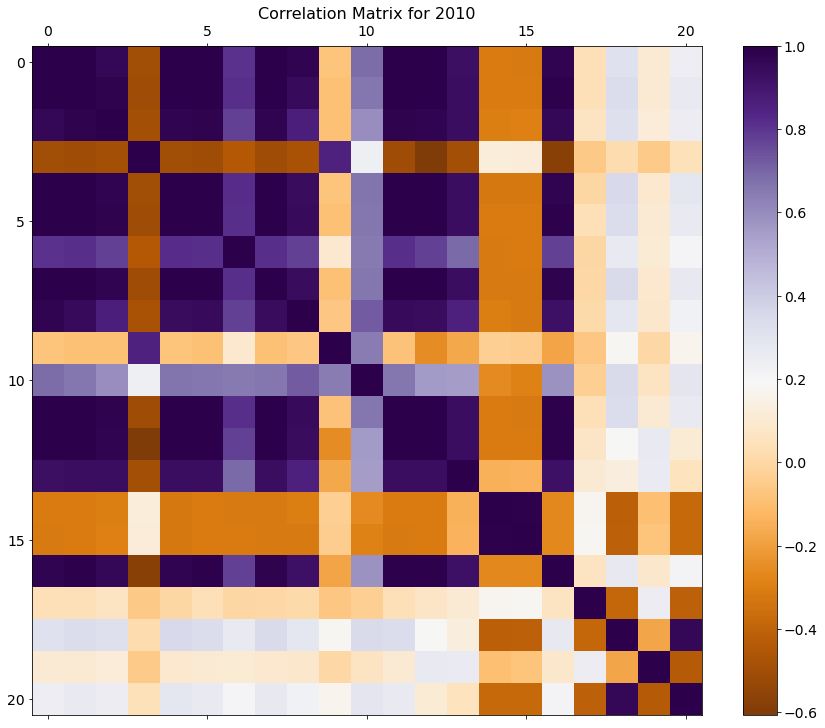

0: BIRTHS2010
1: CENSUSPOP2010
2: DEATHS2010
3: DOMESTICMIG2010
4: EMPLOYED2010
5: ESTIMATESBASE2010
6: INTERNATIONALMIG2010
7: LABOR_FORCE2010
8: NATURALINC2010
9: NETMIG2010
10: NPOPCHG_2010
11: POPESTIMATE2010
12: POP_CDC2010
13: SCDEATHS2010
14: SCRATE2010
15: SC_R_DEATH2010
16: UNEMPLOYED2010
17: UNEMPLOYMENT_RATE_PCT2010
18: mean_income__dollars2010
19: mean_to_median_household_income_ratio2010
20: median_income__dollars2010
Got 3408 rows for 2011


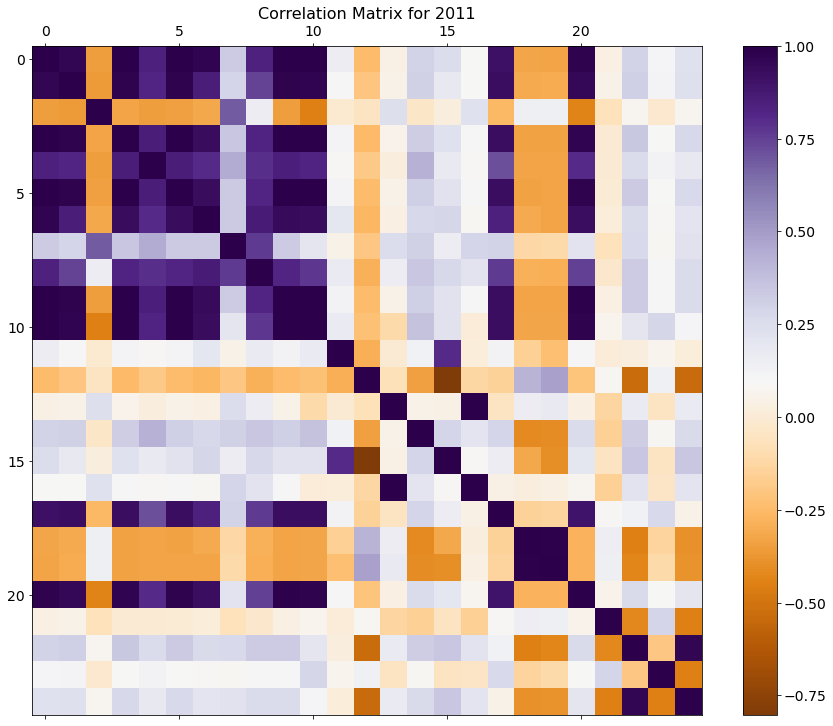

0: BIRTHS2011
1: DEATHS2011
2: DOMESTICMIG2011
3: EMPLOYED2011
4: INTERNATIONALMIG2011
5: LABOR_FORCE2011
6: NATURALINC2011
7: NETMIG2011
8: NPOPCHG_2011
9: POPESTIMATE2011
10: POP_CDC2011
11: RBIRTH2011
12: RDEATH2011
13: RDOMESTICMIG2011
14: RINTERNATIONALMIG2011
15: RNATURALINC2011
16: RNETMIG2011
17: SCDEATHS2011
18: SCRATE2011
19: SC_R_DEATH2011
20: UNEMPLOYED2011
21: UNEMPLOYMENT_RATE_PCT2011
22: mean_income__dollars2011
23: mean_to_median_household_income_ratio2011
24: median_income__dollars2011
Got 3408 rows for 2012


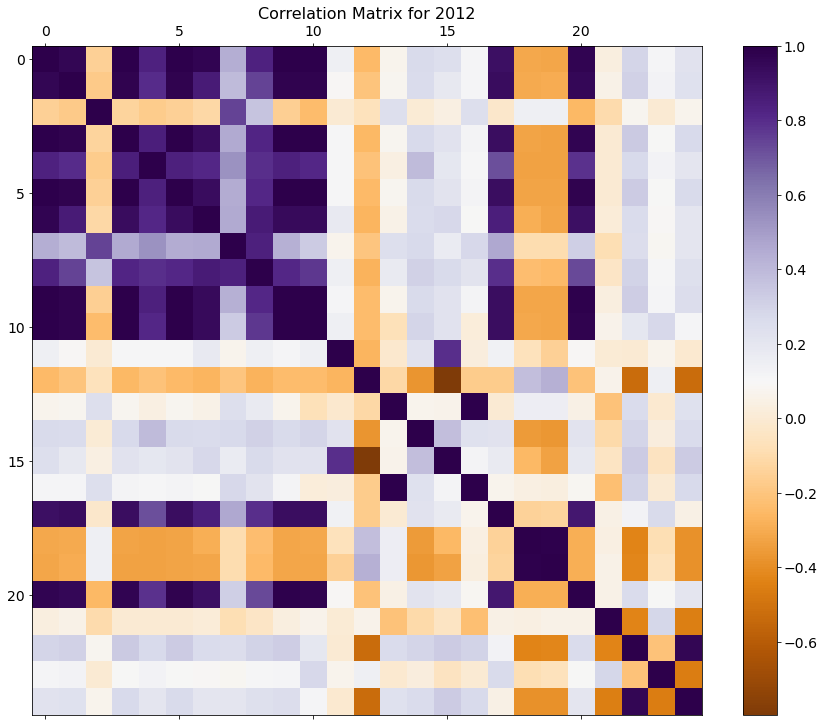

0: BIRTHS2012
1: DEATHS2012
2: DOMESTICMIG2012
3: EMPLOYED2012
4: INTERNATIONALMIG2012
5: LABOR_FORCE2012
6: NATURALINC2012
7: NETMIG2012
8: NPOPCHG_2012
9: POPESTIMATE2012
10: POP_CDC2012
11: RBIRTH2012
12: RDEATH2012
13: RDOMESTICMIG2012
14: RINTERNATIONALMIG2012
15: RNATURALINC2012
16: RNETMIG2012
17: SCDEATHS2012
18: SCRATE2012
19: SC_R_DEATH2012
20: UNEMPLOYED2012
21: UNEMPLOYMENT_RATE_PCT2012
22: mean_income__dollars2012
23: mean_to_median_household_income_ratio2012
24: median_income__dollars2012
Got 3408 rows for 2013


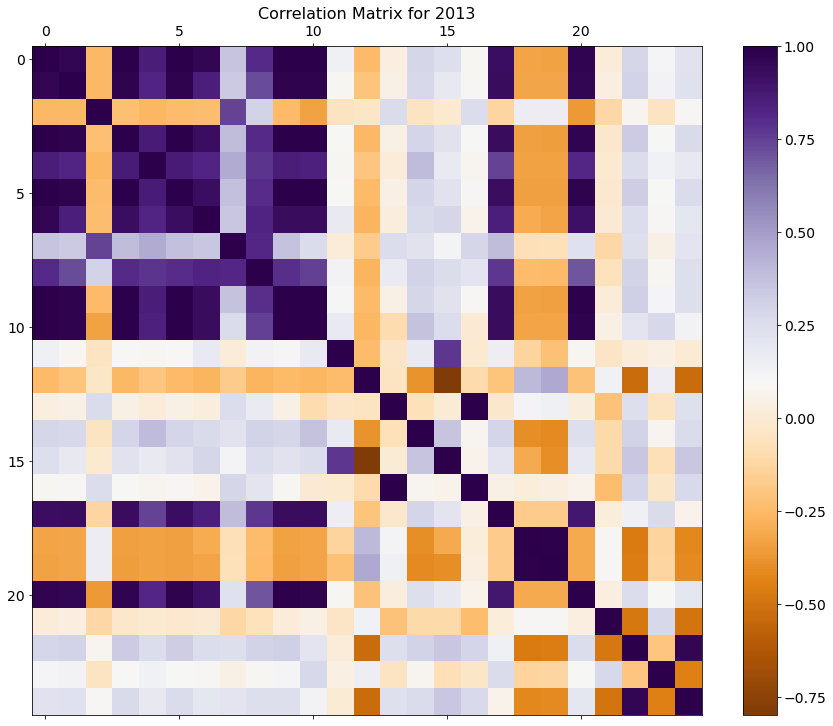

0: BIRTHS2013
1: DEATHS2013
2: DOMESTICMIG2013
3: EMPLOYED2013
4: INTERNATIONALMIG2013
5: LABOR_FORCE2013
6: NATURALINC2013
7: NETMIG2013
8: NPOPCHG_2013
9: POPESTIMATE2013
10: POP_CDC2013
11: RBIRTH2013
12: RDEATH2013
13: RDOMESTICMIG2013
14: RINTERNATIONALMIG2013
15: RNATURALINC2013
16: RNETMIG2013
17: SCDEATHS2013
18: SCRATE2013
19: SC_R_DEATH2013
20: UNEMPLOYED2013
21: UNEMPLOYMENT_RATE_PCT2013
22: mean_income__dollars2013
23: mean_to_median_household_income_ratio2013
24: median_income__dollars2013
Got 3408 rows for 2014


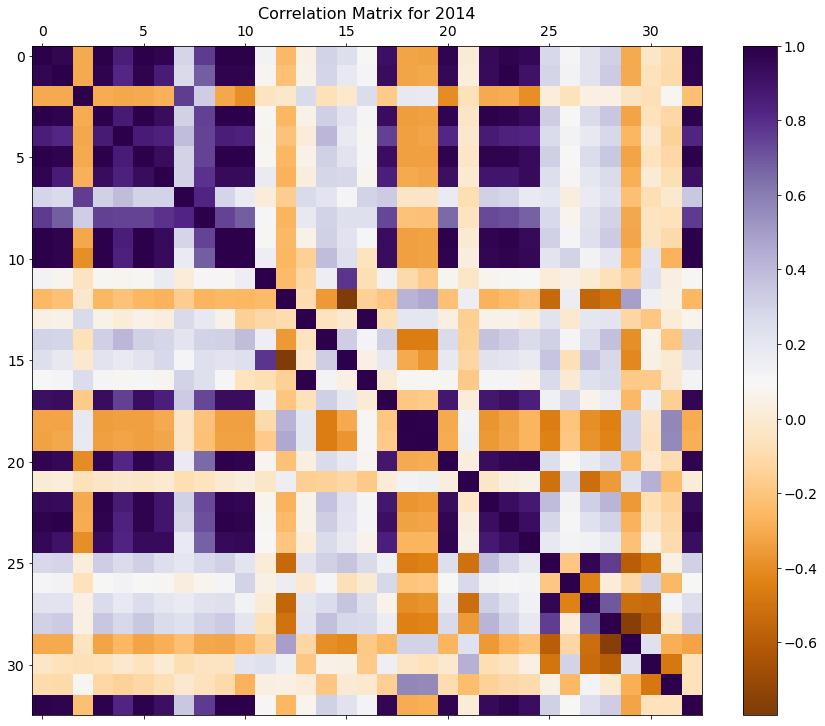

0: BIRTHS2014
1: DEATHS2014
2: DOMESTICMIG2014
3: EMPLOYED2014
4: INTERNATIONALMIG2014
5: LABOR_FORCE2014
6: NATURALINC2014
7: NETMIG2014
8: NPOPCHG_2014
9: POPESTIMATE2014
10: POP_CDC2014
11: RBIRTH2014
12: RDEATH2014
13: RDOMESTICMIG2014
14: RINTERNATIONALMIG2014
15: RNATURALINC2014
16: RNETMIG2014
17: SCDEATHS2014
18: SCRATE2014
19: SC_R_DEATH2014
20: UNEMPLOYED2014
21: UNEMPLOYMENT_RATE_PCT2014
22: bachelors_degree_plus2014
23: high_school_diploma2014
24: lt_high_school_diploma2014
25: mean_income__dollars2014
26: mean_to_median_household_income_ratio2014
27: median_income__dollars2014
28: pct__bachelors_degree_plus2014
29: pct__high_school_diploma2014
30: pct__lt_high_school_diploma2014
31: pct__some_college_or_assoc_degree2014
32: some_college_or_assoc_degree2014
Got 3408 rows for 2015


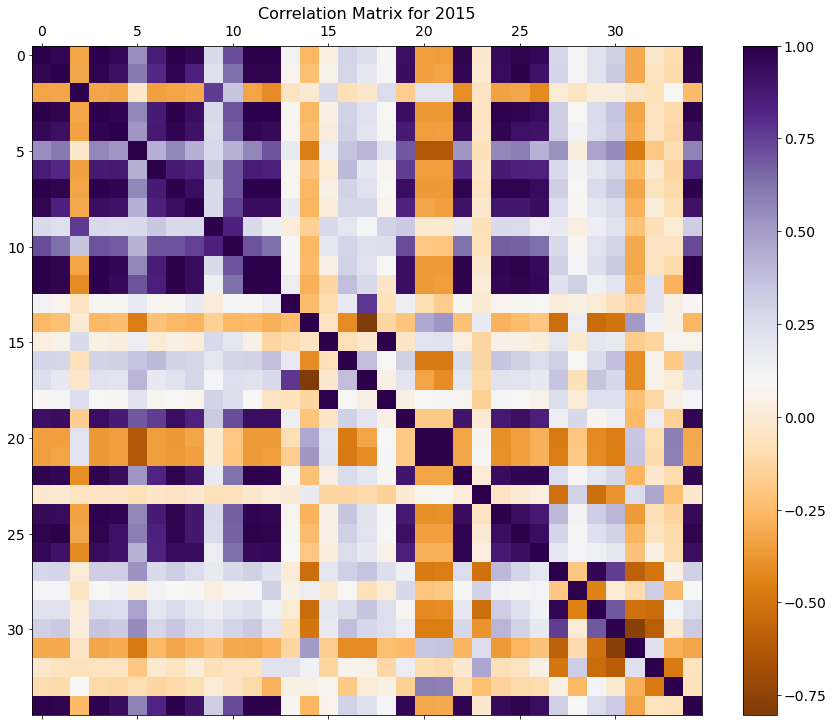

0: BIRTHS2015
1: DEATHS2015
2: DOMESTICMIG2015
3: EMPLOYED2015
4: GDP2015
5: GDP_LOG2015
6: INTERNATIONALMIG2015
7: LABOR_FORCE2015
8: NATURALINC2015
9: NETMIG2015
10: NPOPCHG_2015
11: POPESTIMATE2015
12: POP_CDC2015
13: RBIRTH2015
14: RDEATH2015
15: RDOMESTICMIG2015
16: RINTERNATIONALMIG2015
17: RNATURALINC2015
18: RNETMIG2015
19: SCDEATHS2015
20: SCRATE2015
21: SC_R_DEATH2015
22: UNEMPLOYED2015
23: UNEMPLOYMENT_RATE_PCT2015
24: bachelors_degree_plus2015
25: high_school_diploma2015
26: lt_high_school_diploma2015
27: mean_income__dollars2015
28: mean_to_median_household_income_ratio2015
29: median_income__dollars2015
30: pct__bachelors_degree_plus2015
31: pct__high_school_diploma2015
32: pct__lt_high_school_diploma2015
33: pct__some_college_or_assoc_degree2015
34: some_college_or_assoc_degree2015
Got 3408 rows for 2016


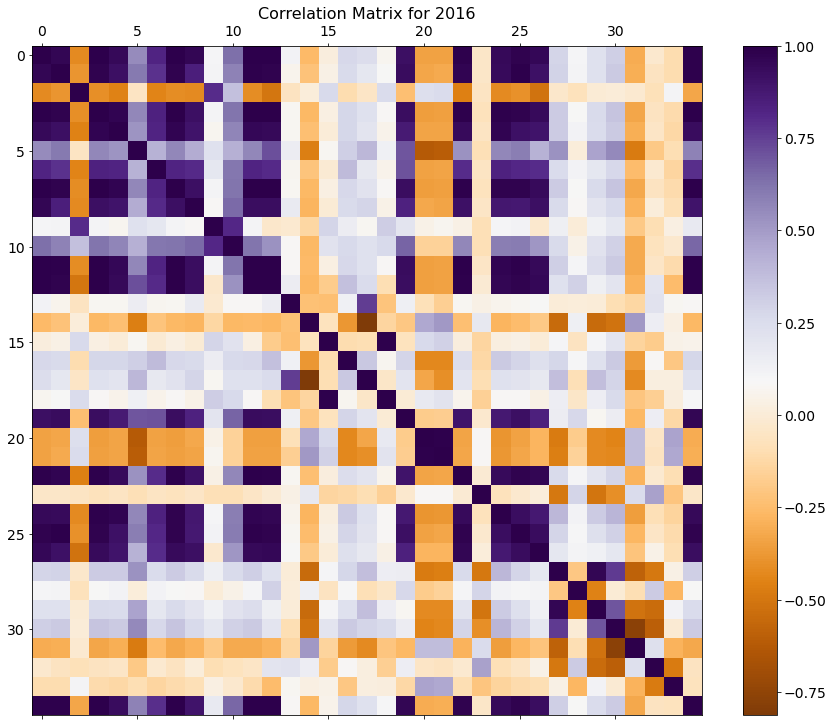

0: BIRTHS2016
1: DEATHS2016
2: DOMESTICMIG2016
3: EMPLOYED2016
4: GDP2016
5: GDP_LOG2016
6: INTERNATIONALMIG2016
7: LABOR_FORCE2016
8: NATURALINC2016
9: NETMIG2016
10: NPOPCHG_2016
11: POPESTIMATE2016
12: POP_CDC2016
13: RBIRTH2016
14: RDEATH2016
15: RDOMESTICMIG2016
16: RINTERNATIONALMIG2016
17: RNATURALINC2016
18: RNETMIG2016
19: SCDEATHS2016
20: SCRATE2016
21: SC_R_DEATH2016
22: UNEMPLOYED2016
23: UNEMPLOYMENT_RATE_PCT2016
24: bachelors_degree_plus2016
25: high_school_diploma2016
26: lt_high_school_diploma2016
27: mean_income__dollars2016
28: mean_to_median_household_income_ratio2016
29: median_income__dollars2016
30: pct__bachelors_degree_plus2016
31: pct__high_school_diploma2016
32: pct__lt_high_school_diploma2016
33: pct__some_college_or_assoc_degree2016
34: some_college_or_assoc_degree2016
Got 3408 rows for 2017


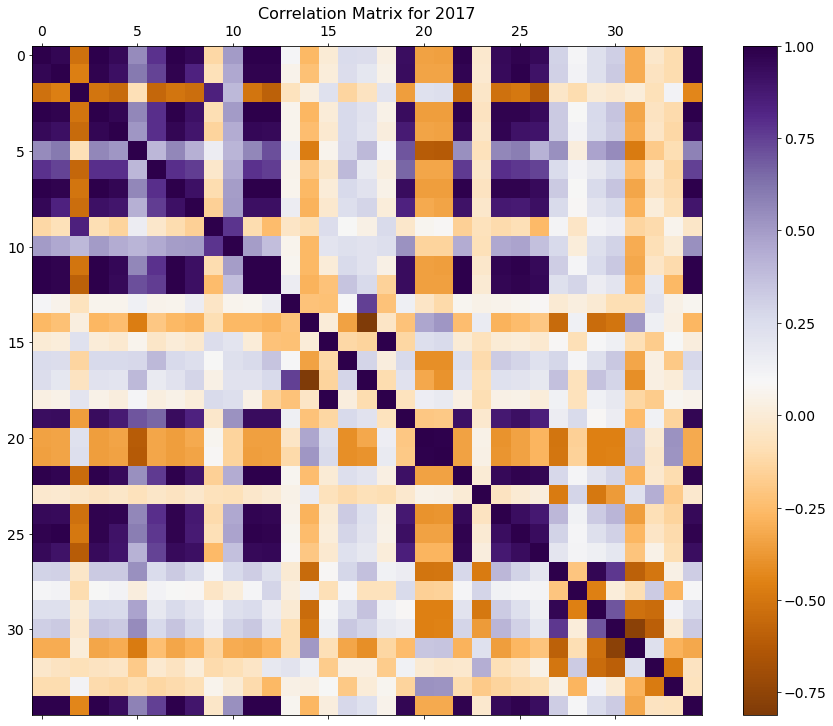

0: BIRTHS2017
1: DEATHS2017
2: DOMESTICMIG2017
3: EMPLOYED2017
4: GDP2017
5: GDP_LOG2017
6: INTERNATIONALMIG2017
7: LABOR_FORCE2017
8: NATURALINC2017
9: NETMIG2017
10: NPOPCHG_2017
11: POPESTIMATE2017
12: POP_CDC2017
13: RBIRTH2017
14: RDEATH2017
15: RDOMESTICMIG2017
16: RINTERNATIONALMIG2017
17: RNATURALINC2017
18: RNETMIG2017
19: SCDEATHS2017
20: SCRATE2017
21: SC_R_DEATH2017
22: UNEMPLOYED2017
23: UNEMPLOYMENT_RATE_PCT2017
24: bachelors_degree_plus2017
25: high_school_diploma2017
26: lt_high_school_diploma2017
27: mean_income__dollars2017
28: mean_to_median_household_income_ratio2017
29: median_income__dollars2017
30: pct__bachelors_degree_plus2017
31: pct__high_school_diploma2017
32: pct__lt_high_school_diploma2017
33: pct__some_college_or_assoc_degree2017
34: some_college_or_assoc_degree2017
Got 3408 rows for 2018


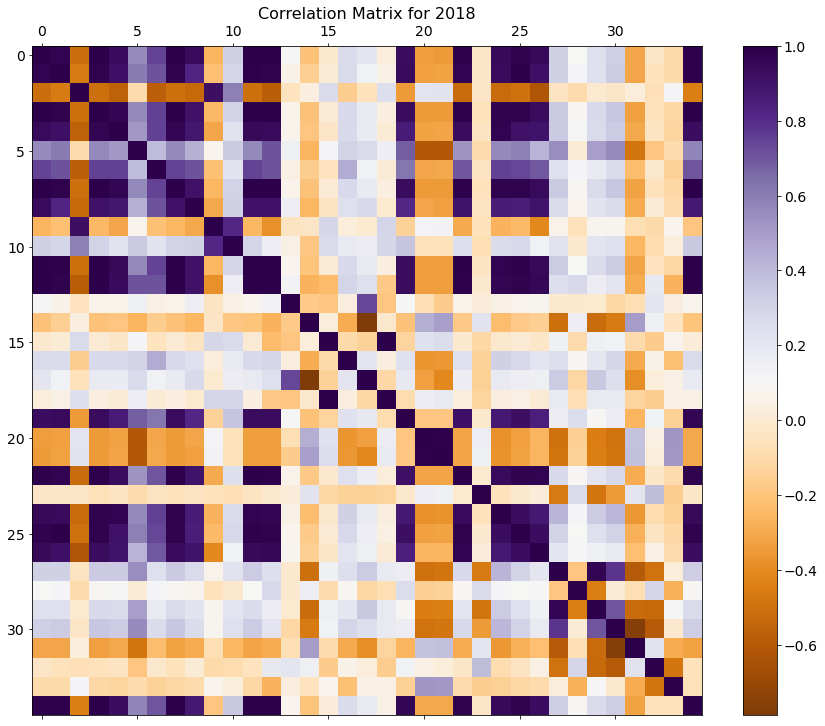

0: BIRTHS2018
1: DEATHS2018
2: DOMESTICMIG2018
3: EMPLOYED2018
4: GDP2018
5: GDP_LOG2018
6: INTERNATIONALMIG2018
7: LABOR_FORCE2018
8: NATURALINC2018
9: NETMIG2018
10: NPOPCHG_2018
11: POPESTIMATE2018
12: POP_CDC2018
13: RBIRTH2018
14: RDEATH2018
15: RDOMESTICMIG2018
16: RINTERNATIONALMIG2018
17: RNATURALINC2018
18: RNETMIG2018
19: SCDEATHS2018
20: SCRATE2018
21: SC_R_DEATH2018
22: UNEMPLOYED2018
23: UNEMPLOYMENT_RATE_PCT2018
24: bachelors_degree_plus2018
25: high_school_diploma2018
26: lt_high_school_diploma2018
27: mean_income__dollars2018
28: mean_to_median_household_income_ratio2018
29: median_income__dollars2018
30: pct__bachelors_degree_plus2018
31: pct__high_school_diploma2018
32: pct__lt_high_school_diploma2018
33: pct__some_college_or_assoc_degree2018
34: some_college_or_assoc_degree2018


In [41]:
%run ./mobilityHelpers.ipynb
helpers = mobilityHelpers()
plt.rcParams.update({"font.size": 28})

for yy in range(2010, 2019):
    yyDF = hhi_gdp_pop_sc_emp_ed_df[[cc for cc in hhi_gdp_pop_sc_emp_ed_df if str(yy) in cc]].copy()
    #     for cc in yyDF.columns:
    #         yyDF[cc] = yyDF[cc].astype("float64")
    print(f"""Got {len(yyDF)} rows for {yy}""")
    helpers.plotCorrMatrix(yyDF, "Correlation Matrix for " + str(yy))
    for ii in range(len(yyDF.columns)):
        print(f"""{ii}: {list(yyDF.columns)[ii]}""")


In every year, there is a lot of multicollinearity.  

For some pairs of variables, it is expected mathematically: e.g., US Census population counts are measured only once in 10 years, and then model the rest based on migration and birth/death dynamics.  Suicide deaths ("SCDEATHS" in our dataset) will be correlated with death counts collected by the Census Bureau for each year ("DEATHS" in our dataset) and with suicide rate ("SCRATE").  Mean Household Income will be correlated with Median Household Income, although that correlation will vary by county.

For others, it is not expected mathematically, but logically sound: e.g., in 2018, suicide attempt rate ("SCRATE", variable 18) is strongly negatively correlated with mean (variable 20) and median household income (variable 22) and to a lesser degree with the economic disparity measured as "mean_to_median_household_income_ratio" (variable 21).

For still others, we have some surprises:  e.g., in 2018, suicide deaths ("SCDEATHS", variable 17) are positively correlated with domestic migration into the county ("DOMESTICMIG", variable 2) and with GDP (variable 3); at the same time these relationships are opposite for suicide attempt rate ("SCRATE", variable 18) and for suicide death rate ("SC_R_DEATH", variable 19).

Our variable of interest, net migration into the county ("NETMIG", variable 7), is very strongly positively correlated with GDP (variable 3) and very mildly negatively correlated with household income disparity (variable 18).  Interestingly, it is also negatively correlated with international migration into the county ("INTERNATIONALMIG", variable 5), number of births in the county ("BIRTHS", variable 0), and household income (variables 17 and 19) in the target county and positively with domestic migration ("DOMESTICMIG", variable 2).

***TODO: Express verbally what else we see in the correlation matrix plots***

To avoid data leakage and perfect accuracy (meaning model is overfitted), we need to do the following:

1. Perform PCA to combine variables into principal components
2. Identify top N principal components based on their contribution to variance (CTV)
3. Build predictive models

In [37]:
hhi_gdp_pop_sc_emp_ed_long.head()

,county,county_state,metric,state,value,year,metric_year
0,Autauga,"Autauga, Alabama",GDP,Alabama,1518409.0,2015,GDP2015
1,Baldwin,"Baldwin, Alabama",GDP,Alabama,5345363.0,2015,GDP2015
2,Barbour,"Barbour, Alabama",GDP,Alabama,756590.0,2015,GDP2015
3,Bibb,"Bibb, Alabama",GDP,Alabama,358372.0,2015,GDP2015
4,Blount,"Blount, Alabama",GDP,Alabama,824934.0,2015,GDP2015


Do the same correlation analysis including the year:

In [44]:
# del hhi_gdp_pop_sc_long["metric_year"]
hhi_gdp_pop_sc_emp_ed_yr_df = hhi_gdp_pop_sc_emp_ed_long.pivot_table(index=["county_state", "year"],
                                                    columns=["metric"],
                                                    values=["value"]).reset_index(drop=False)
cols = ["county_state"]
cols.extend(["year"])
cols.extend(list(hhi_gdp_pop_sc_emp_ed_yr_df.columns.levels[1][:-1]))


hhi_gdp_pop_sc_emp_ed_yr_df.columns = cols

hhi_gdp_pop_sc_emp_ed_yr_df.year = hhi_gdp_pop_sc_emp_ed_yr_df.year.astype("float64")
hhi_gdp_pop_sc_emp_ed_yr_df.reset_index(drop=True, inplace=True)

print(hhi_gdp_pop_sc_emp_ed_yr_df.dtypes)

hhi_gdp_pop_sc_emp_yr_ed_df.head()

county_state                              object
year                                     float64
BIRTHS                                   float64
CENSUSPOP                                float64
DEATHS                                   float64
DOMESTICMIG                              float64
EMPLOYED                                 float64
ESTIMATESBASE                            float64
GDP                                      float64
GDP_LOG                                  float64
INTERNATIONALMIG                         float64
LABOR_FORCE                              float64
NATURALINC                               float64
NETMIG                                   float64
NPOPCHG_                                 float64
POPESTIMATE                              float64
POP_CDC                                  float64
RBIRTH                                   float64
RDEATH                                   float64
RDOMESTICMIG                             float64
RINTERNATIONALMIG   

NameError: name 'hhi_gdp_pop_sc_emp_yr_ed_df' is not defined

Build a linear-correlation matrix:

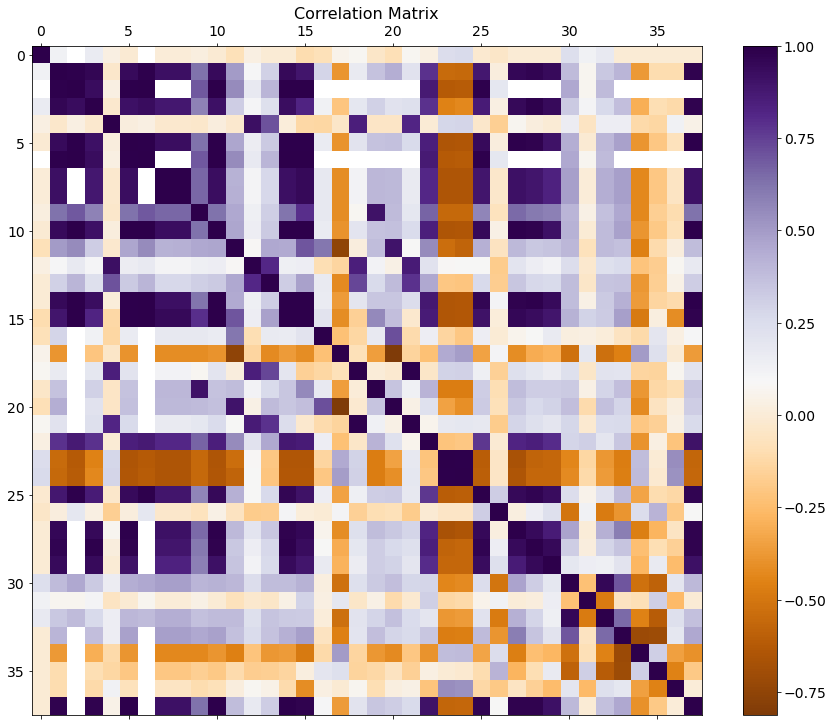

0: year
1: BIRTHS
2: CENSUSPOP
3: DEATHS
4: DOMESTICMIG
5: EMPLOYED
6: ESTIMATESBASE
7: GDP
8: GDP_LOG
9: INTERNATIONALMIG
10: LABOR_FORCE
11: NATURALINC
12: NETMIG
13: NPOPCHG_
14: POPESTIMATE
15: POP_CDC
16: RBIRTH
17: RDEATH
18: RDOMESTICMIG
19: RINTERNATIONALMIG
20: RNATURALINC
21: RNETMIG
22: SCDEATHS
23: SCRATE
24: SC_R_DEATH
25: UNEMPLOYED
26: UNEMPLOYMENT_RATE_PCT
27: bachelors_degree_plus
28: high_school_diploma
29: lt_high_school_diploma
30: mean_income__dollars
31: mean_to_median_household_income_ratio
32: median_income__dollars
33: pct__bachelors_degree_plus
34: pct__high_school_diploma
35: pct__lt_high_school_diploma
36: pct__some_college_or_assoc_degree
37: some_college_or_assoc_degree


,year,BIRTHS,CENSUSPOP,DEATHS,DOMESTICMIG,EMPLOYED,ESTIMATESBASE,GDP,GDP_LOG,INTERNATIONALMIG,...,high_school_diploma,lt_high_school_diploma,mean_income__dollars,mean_to_median_household_income_ratio,median_income__dollars,pct__bachelors_degree_plus,pct__high_school_diploma,pct__lt_high_school_diploma,pct__some_college_or_assoc_degree,some_college_or_assoc_degree
0,2000.0,NaN,NaN,NaN,NaN,12119.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001.0,NaN,NaN,NaN,NaN,11491.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002.0,NaN,NaN,NaN,NaN,10889.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003.0,NaN,NaN,NaN,NaN,10736.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004.0,NaN,NaN,NaN,NaN,10955.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
%run ./mobilityHelpers.ipynb
helpers = mobilityHelpers()

hhi_gdp_pop_sc_emp_ed_yr_correl = hhi_gdp_pop_sc_emp_ed_yr_df.copy()
del hhi_gdp_pop_sc_emp_ed_yr_correl["county_state"]

helpers.plotCorrMatrix(hhi_gdp_pop_sc_emp_ed_yr_correl, "Correlation Matrix", method="spearman")
for ii in range(len(hhi_gdp_pop_sc_emp_ed_yr_correl.columns)):
    print(f"""{ii}: {list(hhi_gdp_pop_sc_emp_ed_yr_correl.columns)[ii]}""")
hhi_gdp_pop_sc_emp_ed_yr_correl.head()

Build a monotonic-correlation matrix:

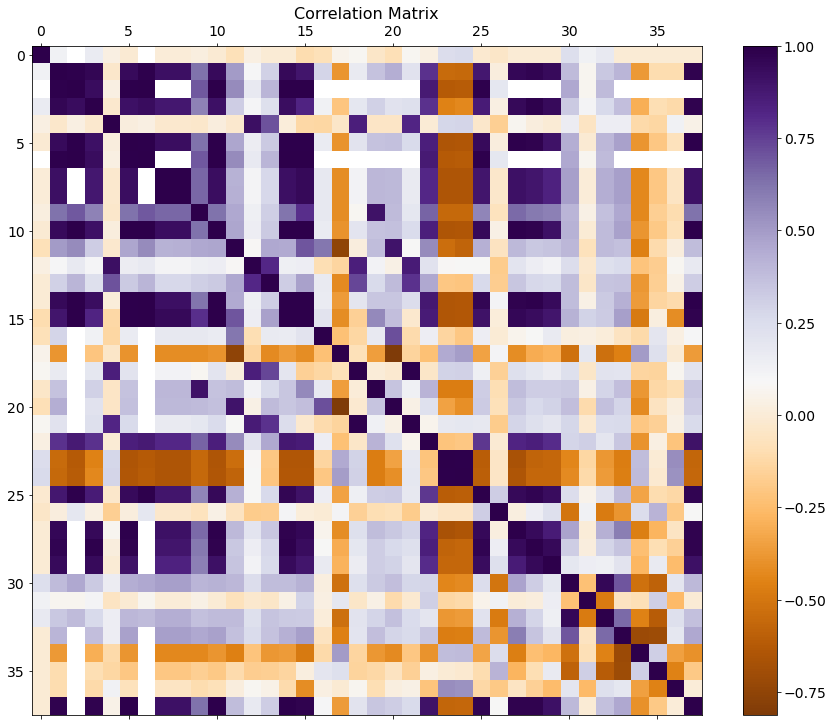

0: year
1: BIRTHS
2: CENSUSPOP
3: DEATHS
4: DOMESTICMIG
5: EMPLOYED
6: ESTIMATESBASE
7: GDP
8: GDP_LOG
9: INTERNATIONALMIG
10: LABOR_FORCE
11: NATURALINC
12: NETMIG
13: NPOPCHG_
14: POPESTIMATE
15: POP_CDC
16: RBIRTH
17: RDEATH
18: RDOMESTICMIG
19: RINTERNATIONALMIG
20: RNATURALINC
21: RNETMIG
22: SCDEATHS
23: SCRATE
24: SC_R_DEATH
25: UNEMPLOYED
26: UNEMPLOYMENT_RATE_PCT
27: bachelors_degree_plus
28: high_school_diploma
29: lt_high_school_diploma
30: mean_income__dollars
31: mean_to_median_household_income_ratio
32: median_income__dollars
33: pct__bachelors_degree_plus
34: pct__high_school_diploma
35: pct__lt_high_school_diploma
36: pct__some_college_or_assoc_degree
37: some_college_or_assoc_degree


,year,BIRTHS,CENSUSPOP,DEATHS,DOMESTICMIG,EMPLOYED,ESTIMATESBASE,GDP,GDP_LOG,INTERNATIONALMIG,...,high_school_diploma,lt_high_school_diploma,mean_income__dollars,mean_to_median_household_income_ratio,median_income__dollars,pct__bachelors_degree_plus,pct__high_school_diploma,pct__lt_high_school_diploma,pct__some_college_or_assoc_degree,some_college_or_assoc_degree
0,2000.0,NaN,NaN,NaN,NaN,12119.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001.0,NaN,NaN,NaN,NaN,11491.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002.0,NaN,NaN,NaN,NaN,10889.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003.0,NaN,NaN,NaN,NaN,10736.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004.0,NaN,NaN,NaN,NaN,10955.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
%run ./mobilityHelpers.ipynb
helpers = mobilityHelpers()

hhi_gdp_pop_sc_emp_ed_yr_correl = hhi_gdp_pop_sc_emp_ed_yr_df.copy()
del hhi_gdp_pop_sc_emp_ed_yr_correl["county_state"]

helpers.plotCorrMatrix(hhi_gdp_pop_sc_emp_ed_yr_correl, "Correlation Matrix", method="spearman")
for ii in range(len(hhi_gdp_pop_sc_emp_ed_yr_correl.columns)):
    print(f"""{ii}: {list(hhi_gdp_pop_sc_emp_ed_yr_correl.columns)[ii]}""")
hhi_gdp_pop_sc_emp_ed_yr_correl.head()

We have 37x37 features, which is potentially 1369 correlations.  We are only interested in those that are correlated with the target variables: NETMIG, DOMESTICMIG, and INTERNATIONALMIG.  We are not interested in correlations weaker than +/- 0.25, and we are not interested in perfect 100% correlations

In [48]:
matCorr = hhi_gdp_pop_sc_emp_ed_yr_correl.corr()

corrDF = matCorr.stack(dropna=True).reset_index()
corrDF.columns = ["feature_1", "feature_2", "correlation"]
correlated_features = \
    corrDF[(abs(corrDF["correlation"]) > 0.25) & \
           (abs(corrDF["correlation"]) != 1.0)].copy().reset_index(drop=True)

# correlated_features.sort_values("correlation", inplace=True).reset_index(drop=True)
correlated_features

,feature_1,feature_2,correlation
0,year,SC_R_DEATH,0.251364
1,BIRTHS,CENSUSPOP,0.992833
2,BIRTHS,DEATHS,0.960296
3,BIRTHS,DOMESTICMIG,-0.378249
4,BIRTHS,EMPLOYED,0.961687
...,...,...,...
673,some_college_or_assoc_degree,high_school_diploma,0.978289
674,some_college_or_assoc_degree,lt_high_school_diploma,0.928865
675,some_college_or_assoc_degree,mean_income__dollars,0.308297
676,some_college_or_assoc_degree,pct__bachelors_degree_plus,0.324663


Check correlation between different sources of population estimate

In [50]:
pop_corr = \
    correlated_features.loc[(correlated_features["feature_1"].str.contains("POP"))
                        & (correlated_features["feature_2"].str.contains("POP"))]
pop_corr.sort_values("correlation").reset_index(drop=True)

,feature_1,feature_2,correlation
0,NPOPCHG_,POP_CDC,0.564596
1,POP_CDC,NPOPCHG_,0.564596
2,NPOPCHG_,POPESTIMATE,0.612064
3,POPESTIMATE,NPOPCHG_,0.612064
4,CENSUSPOP,NPOPCHG_,0.659576
5,NPOPCHG_,CENSUSPOP,0.659576
6,POPESTIMATE,POP_CDC,0.999987
7,POP_CDC,POPESTIMATE,0.999987
8,CENSUSPOP,POPESTIMATE,0.999998
9,POPESTIMATE,CENSUSPOP,0.999998


We see that POPESTIMATE, POP_CDC, CENSUSPOP are all closely correlated; for further analysis, we might as well remove all but one - or we can wait for PCA (Principal Component Analysis) to do it for us.

In [51]:
tgtCorr = matCorr[["NETMIG", "DOMESTICMIG", "INTERNATIONALMIG"]].copy()
tgtCorr = tgtCorr.loc[[ii for ii in list(tgtCorr.index) if 'MIG' not in ii]].copy()

tgtCorrTr = pd.DataFrame(tgtCorr.dropna().T)
# tgtCorrTr.column = list(tgtCorr.index)

Columns:
0: NETMIG
1: DOMESTICMIG
2: INTERNATIONALMIG


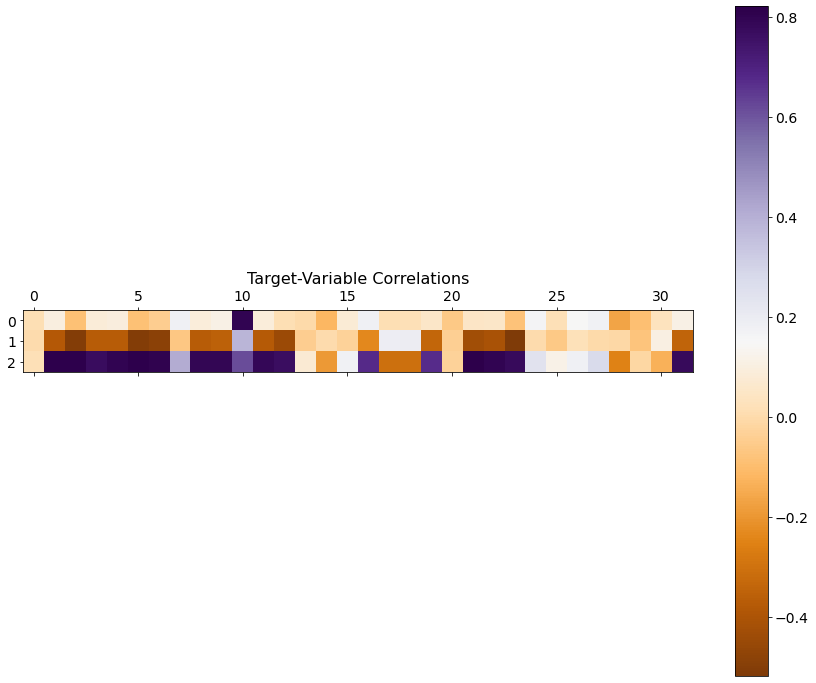

Rows:
0: year
1: BIRTHS
2: CENSUSPOP
3: DEATHS
4: EMPLOYED
5: ESTIMATESBASE
6: GDP
7: GDP_LOG
8: LABOR_FORCE
9: NATURALINC
10: NPOPCHG_
11: POPESTIMATE
12: POP_CDC
13: RBIRTH
14: RDEATH
15: RNATURALINC
16: SCDEATHS
17: SCRATE
18: SC_R_DEATH
19: UNEMPLOYED
20: UNEMPLOYMENT_RATE_PCT
21: bachelors_degree_plus
22: high_school_diploma
23: lt_high_school_diploma
24: mean_income__dollars
25: mean_to_median_household_income_ratio
26: median_income__dollars
27: pct__bachelors_degree_plus
28: pct__high_school_diploma
29: pct__lt_high_school_diploma
30: pct__some_college_or_assoc_degree
31: some_college_or_assoc_degree


In [52]:
print("Columns:")
for ii in range(len(tgtCorrTr.index)):
    print(f"""{ii}: {tgtCorrTr.index[ii]}""")
helpers.plotGivenCorrMatrix(tgtCorr.dropna().T, "Target-Variable Correlations")

colnames = list(tgtCorr.index)
tgtCorrTr.columns = colnames

print("Rows:")
for ii in range(len(tgtCorrTr.columns)):
    print(f"""{ii}: {tgtCorrTr.columns[ii]}""")

We see that there is a slight negative correlation with time for all metrics, but it is mostly irrelevant.  A more interesting observation is the counteracting effect of all features on international and domestic migraion: features positively correlated with one are negatively correlated with the other

In [53]:
tgtCorrDF = tgtCorr.stack(dropna=True).reset_index()
tgtCorrDF.columns = ["feature_1", "feature_2", "correlation"]
tgt_correlated_features = \
    tgtCorrDF[(abs(tgtCorrDF["correlation"]) > 0.15) & \
           (abs(tgtCorrDF["correlation"]) != 1.0)].copy().reset_index(drop=True)

tgt_correlated_features.sort_values("correlation").reset_index(drop=True)

,feature_1,feature_2,correlation
0,lt_high_school_diploma,DOMESTICMIG,-0.518214
1,ESTIMATESBASE,DOMESTICMIG,-0.506583
2,CENSUSPOP,DOMESTICMIG,-0.506557
3,GDP,DOMESTICMIG,-0.483079
4,POP_CDC,DOMESTICMIG,-0.440742
5,bachelors_degree_plus,DOMESTICMIG,-0.426744
6,high_school_diploma,DOMESTICMIG,-0.407369
7,BIRTHS,DOMESTICMIG,-0.378249
8,POPESTIMATE,DOMESTICMIG,-0.374290
9,LABOR_FORCE,DOMESTICMIG,-0.371725


NET Migration

In [54]:
helpers.analyzeCorr4Migrations(tgt_correlated_features, "NETMIG")


-------------------------------------------
NETMIG into US counties is negatively correlated with:

pct__high_school_diploma

-------------------------------------------
NETMIG into US counties is positively correlated with:

mean_income__dollars
pct__bachelors_degree_plus
GDP_LOG
SCDEATHS
NPOPCHG_


,feature_1,feature_2,correlation
0,pct__high_school_diploma,NETMIG,-0.166632
1,mean_income__dollars,NETMIG,0.164445
2,pct__bachelors_degree_plus,NETMIG,0.172826
3,GDP_LOG,NETMIG,0.180016
4,SCDEATHS,NETMIG,0.180821
5,NPOPCHG_,NETMIG,0.796717


DOMESTIC Migration

In [55]:
helpers.analyzeCorr4Migrations(tgt_correlated_features, "DOMESTICMIG")


-------------------------------------------
DOMESTICMIG into US counties is negatively correlated with:

lt_high_school_diploma
ESTIMATESBASE
CENSUSPOP
GDP
POP_CDC
bachelors_degree_plus
high_school_diploma
BIRTHS
POPESTIMATE
LABOR_FORCE
EMPLOYED
DEATHS
NATURALINC
some_college_or_assoc_degree
UNEMPLOYED
SCDEATHS

-------------------------------------------
DOMESTICMIG into US counties is positively correlated with:

SCRATE
SC_R_DEATH
NPOPCHG_


,feature_1,feature_2,correlation
0,lt_high_school_diploma,DOMESTICMIG,-0.518214
1,ESTIMATESBASE,DOMESTICMIG,-0.506583
2,CENSUSPOP,DOMESTICMIG,-0.506557
3,GDP,DOMESTICMIG,-0.483079
4,POP_CDC,DOMESTICMIG,-0.440742
5,bachelors_degree_plus,DOMESTICMIG,-0.426744
6,high_school_diploma,DOMESTICMIG,-0.407369
7,BIRTHS,DOMESTICMIG,-0.378249
8,POPESTIMATE,DOMESTICMIG,-0.374290
9,LABOR_FORCE,DOMESTICMIG,-0.371725


In [56]:
helpers.analyzeCorr4Migrations(tgt_correlated_features, "INTERNATIONALMIG")


-------------------------------------------
INTERNATIONALMIG into US counties is negatively correlated with:

SCRATE
SC_R_DEATH
pct__high_school_diploma
RDEATH

-------------------------------------------
INTERNATIONALMIG into US counties is positively correlated with:

RNATURALINC
median_income__dollars
mean_income__dollars
pct__bachelors_degree_plus
GDP_LOG
NPOPCHG_
UNEMPLOYED
SCDEATHS
POP_CDC
DEATHS
lt_high_school_diploma
some_college_or_assoc_degree
POPESTIMATE
NATURALINC
LABOR_FORCE
EMPLOYED
high_school_diploma
GDP
CENSUSPOP
ESTIMATESBASE
BIRTHS
bachelors_degree_plus


,feature_1,feature_2,correlation
0,SCRATE,INTERNATIONALMIG,-0.308604
1,SC_R_DEATH,INTERNATIONALMIG,-0.305001
2,pct__high_school_diploma,INTERNATIONALMIG,-0.246585
3,RDEATH,INTERNATIONALMIG,-0.193278
4,RNATURALINC,INTERNATIONALMIG,0.172757
5,median_income__dollars,INTERNATIONALMIG,0.181767
6,mean_income__dollars,INTERNATIONALMIG,0.245445
7,pct__bachelors_degree_plus,INTERNATIONALMIG,0.274053
8,GDP_LOG,INTERNATIONALMIG,0.411359
9,NPOPCHG_,INTERNATIONALMIG,0.614584


International migration seems to be a more complex phenomenon than domestic migration

In [58]:
csv_out = MYDIR + "hhi_gdp_pop_sc_emp_ed__preparing_for_modeling.csv"
hhi_gdp_pop_sc_emp_ed_df.to_csv(csv_out, index=False)
print(f"""Saved the prepared data to {csv_out}""")

csv_out_long = MYDIR + "hhi_gdp_pop_sc_emp_ed_long__preparing_for_modeling.csv"
hhi_gdp_pop_sc_emp_ed_long.to_csv(csv_out_long, index=False)
print(f"""Saved the prepared data in the long form to {csv_out_long}""")

csv_out_yr = MYDIR + "hhi_gdp_pop_sc_emp_ed_yr__preparing_for_modeling.csv"
hhi_gdp_pop_sc_emp_ed_yr_df.to_csv(csv_out_yr, index=False)
print(f"""Saved the prepared data to {csv_out_yr}""")


Saved the prepared data to ./../../ResearchProposal/hhi_gdp_pop_sc_emp_ed__preparing_for_modeling.csv
Saved the prepared data in the long form to ./../../ResearchProposal/hhi_gdp_pop_sc_emp_ed_long__preparing_for_modeling.csv
Saved the prepared data to ./../../ResearchProposal/hhi_gdp_pop_sc_emp_ed_yr__preparing_for_modeling.csv


In [43]:
# import pandas_profiling
# hhi_gdp_pop_sc_emp_yr_df.profile_report()